In [175]:
# Import
import glob
import pandas as pd
import matplotlib as pp
import matplotlib.pyplot as plt
import seaborn as sns


In [176]:
# Load and concatenate the different set of datas
# Data is published quaterly from https://opendata-ajuntament.barcelona.cat/data/es/dataset/est-mercat-immobiliari-lloguer-mitja-mensual
# Format is YYYY_lloguer_preu_trim.csv

In [177]:
all_files = glob.glob("Data/*.csv")
df = pd.concat((pd.read_csv(f) for f in all_files))

In [178]:
# Add a new column with Date, format YYYY-Quarter
df["Date"] = "Q"+ df["Trimestre"].astype(str) + " " + df['Any'].astype(str)
df["Date"] = pd.to_datetime(['-'.join(x.split()[::-1]) for x in df['Date']])

C:\Users\Yann\AppData\Local\Temp\ipykernel_16128\380720479.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(['-'.join(x.split()[::-1]) for x in df['Date']])


In [179]:
df.reset_index(drop=True)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu,Date
0,2018,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),792.74,2018-01-01
1,2018,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),998.4,2018-01-01
2,2018,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),870.84,2018-01-01
3,2018,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),923.44,2018-01-01
4,2018,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),910.53,2018-01-01
...,...,...,...,...,...,...,...,...,...
3061,2023,2,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),19.2,2023-04-01
3062,2023,2,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),11.9,2023-04-01
3063,2023,2,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),16.7,2023-04-01
3064,2023,2,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),13.2,2023-04-01


In [180]:
# Clean the price column and transtype to float
df.replace("NA",'0', inplace=True)
df['Preu'] = pd.to_numeric(df['Preu'], errors='coerce')

In [245]:
#Split DataFrame in 2, one with the average rent and the other with the average rent per meter square
average_rent = df[df["Lloguer_mitja"]=="Lloguer mitjà mensual (Euros/mes)"].copy()
average_rent_per_size = df[df["Lloguer_mitja"]=="Lloguer mitjà per superfície (Euros/m2 mes)"].copy()

In [246]:
average_rent.reset_index(drop=True)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu,Date
0,2018,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà mensual (Euros/mes),792.74,2018-01-01
1,2018,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà mensual (Euros/mes),998.40,2018-01-01
2,2018,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà mensual (Euros/mes),870.84,2018-01-01
3,2018,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà mensual (Euros/mes),923.44,2018-01-01
4,2018,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà mensual (Euros/mes),910.53,2018-01-01
...,...,...,...,...,...,...,...,...,...
1528,2023,2,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà mensual (Euros/mes),1400.60,2023-04-01
1529,2023,2,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà mensual (Euros/mes),746.90,2023-04-01
1530,2023,2,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà mensual (Euros/mes),1204.20,2023-04-01
1531,2023,2,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà mensual (Euros/mes),960.90,2023-04-01


In [247]:
average_rent_per_size.reset_index(drop=True)

,Any,Trimestre,Codi_Districte,Nom_Districte,Codi_Barri,Nom_Barri,Lloguer_mitja,Preu,Date
0,2018,1,1,Ciutat Vella,1,el Raval,Lloguer mitjà per superfície (Euros/m2 mes),13.74,2018-01-01
1,2018,1,1,Ciutat Vella,2,el Barri Gòtic,Lloguer mitjà per superfície (Euros/m2 mes),13.30,2018-01-01
2,2018,1,1,Ciutat Vella,3,la Barceloneta,Lloguer mitjà per superfície (Euros/m2 mes),17.10,2018-01-01
3,2018,1,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Lloguer mitjà per superfície (Euros/m2 mes),14.68,2018-01-01
4,2018,1,2,Eixample,5,el Fort Pienc,Lloguer mitjà per superfície (Euros/m2 mes),12.63,2018-01-01
...,...,...,...,...,...,...,...,...,...
1528,2023,2,10,Sant Martí,69,Diagonal Mar i el Front Marítim del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),19.20,2023-04-01
1529,2023,2,10,Sant Martí,70,el Besòs i el Maresme,Lloguer mitjà per superfície (Euros/m2 mes),11.90,2023-04-01
1530,2023,2,10,Sant Martí,71,Provençals del Poblenou,Lloguer mitjà per superfície (Euros/m2 mes),16.70,2023-04-01
1531,2023,2,10,Sant Martí,72,Sant Martí de Provençals,Lloguer mitjà per superfície (Euros/m2 mes),13.20,2023-04-01


In [248]:
average_rent_per_size.index = average_rent.index

In [249]:
average_rent['price_per_m2'] = average_rent_per_size["Preu"]

In [250]:
average_rent['Size_per_barrio'] = average_rent['Preu'] / average_rent['price_per_m2']

In [251]:
price_per_barrio = average_rent.pivot(index='Date', columns='Nom_Barri', values='Preu')

In [252]:
price_per_district = average_rent.groupby(["Nom_Districte", "Date"])['Preu'].mean().reset_index()

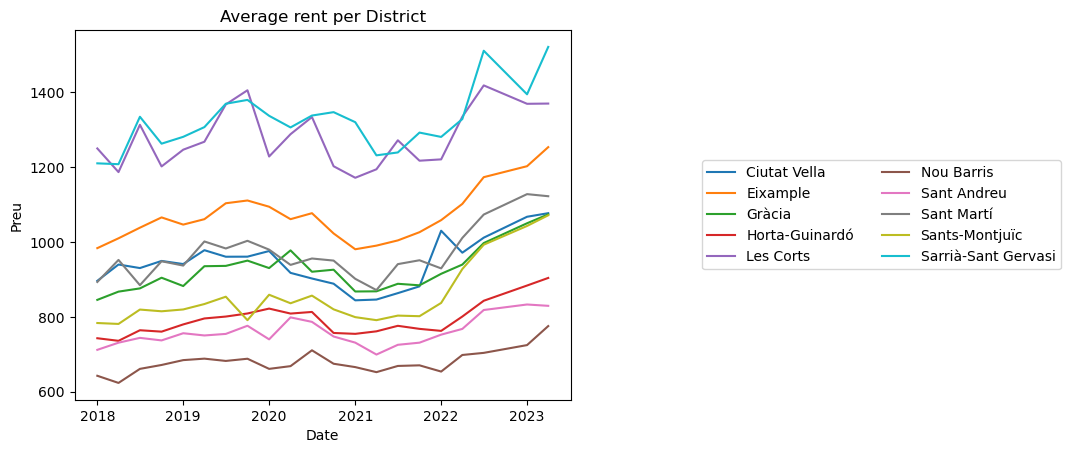

In [256]:
g = sns.lineplot(
    data = price_per_district, 
    x = 'Date', 
    y = 'Preu', 
    hue = 'Nom_Districte'
)
g.set(title='Average rent per District')
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=2)


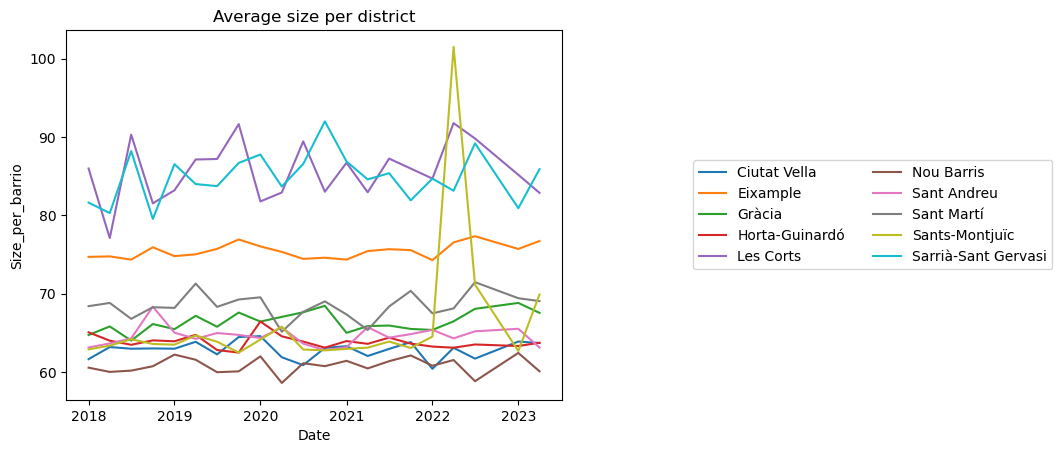

In [254]:
g = sns.lineplot(
    data = average_rent.groupby(["Nom_Districte", "Date"])['Size_per_barrio'].mean().reset_index(), 
    x = 'Date', 
    y = 'Size_per_barrio', 
    hue = 'Nom_Districte'
)
g.set(title = "Average size per district")
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=2)

In [255]:
#Time to dig into each district and have the data per barrio